# Heatmap of differentially expressed genes in an RNA-seq dataset

This notebook follows closely to [this online tutorial](https://training.galaxyproject.org/training-material/topics/transcriptomics/tutorials/rna-seq-viz-with-heatmap2/tutorial.html#create-heatmap-of-top-de-genes).  The datasets are available [here](https://zenodo.org/record/2529926#.YwaRPfHMIas) and should be downloaded into the ```data/heatmap``` directory (which you may have to create).


*Note:* this Jupyter notebook was converted to an R markdown file and then an html file using the following command in R :

```
rmarkdown::convert_ipynb('heatmap_r.ipynb')
rmarkdown::render('heatmap_r.Rmd')
```

___
*Author : Aaron M Geller, Aug. 2022*

In [21]:
# import the necessary libraries
library(tidyr)
library(ggplot2)

## 1. Read in the DE results data using ```read.table```.

In [2]:
DE_results <- read.table('data/heatmap/limma-voom_luminalpregnant-luminallactate.tsv', sep='\t', header=TRUE)
head(DE_results)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"EOF within quoted string"
Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"number of items read is not a multiple of the number of columns"


,ENTREZID,SYMBOL,GENENAME,logFC,AveExpr,t,P.Value,adj.P.Val
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12992,Csn1s2b,casein alpha s2-like B,-8.603611,3.5629500,-43.79650,3.830650e-15,6.053959e-11
2,13358,Slc25a1,"solute carrier family 25 (mitochondrial carrier, citrate transporter), member 1",-4.124175,5.7796989,-29.90785,1.758595e-13,1.389642e-09
3,11941,Atp2b2,"ATPase, Ca++ transporting, plasma membrane 2",-7.386986,1.2821431,-27.81950,4.836363e-13,2.432800e-09
4,20531,Slc34a2,"solute carrier family 34 (sodium phosphate), member 2",-4.177812,4.2786290,-27.07272,6.157428e-13,2.432800e-09
5,100705,Acacb,acetyl-Coenzyme A carboxylase beta,-4.314320,4.4409137,-25.22357,1.499977e-12,4.741129e-09
6,13645,Egf,epidermal growth factor,-5.362664,0.7359047,-24.59930,2.116244e-12,5.574188e-09


## 2. Filter the results to only include the most significant genes.

### 2.1. Set a threshold for ```adj.P.Val < 0.01``` and ```abs(logFC) > 0.58```.

In [3]:
df <- DE_results[which(DE_results['adj.P.Val'] < 0.01 & abs(DE_results['logFC']) > 0.58),]
head(df)

,ENTREZID,SYMBOL,GENENAME,logFC,AveExpr,t,P.Value,adj.P.Val
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12992,Csn1s2b,casein alpha s2-like B,-8.603611,3.5629500,-43.79650,3.830650e-15,6.053959e-11
2,13358,Slc25a1,"solute carrier family 25 (mitochondrial carrier, citrate transporter), member 1",-4.124175,5.7796989,-29.90785,1.758595e-13,1.389642e-09
3,11941,Atp2b2,"ATPase, Ca++ transporting, plasma membrane 2",-7.386986,1.2821431,-27.81950,4.836363e-13,2.432800e-09
4,20531,Slc34a2,"solute carrier family 34 (sodium phosphate), member 2",-4.177812,4.2786290,-27.07272,6.157428e-13,2.432800e-09
5,100705,Acacb,acetyl-Coenzyme A carboxylase beta,-4.314320,4.4409137,-25.22357,1.499977e-12,4.741129e-09
6,13645,Egf,epidermal growth factor,-5.362664,0.7359047,-24.59930,2.116244e-12,5.574188e-09


### 2.2. Sort by ```P.Value``` (in ascending order).

In [4]:
df <- df[order(df$P.Value),]

### 2.3. Select the top 20 for the plot.

In [5]:
DE_results_sig <- head(df, 20)

DE_results_sig

,ENTREZID,SYMBOL,GENENAME,logFC,AveExpr,t,P.Value,adj.P.Val
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12992,Csn1s2b,casein alpha s2-like B,-8.603611,3.5629500,-43.79650,3.830650e-15,6.053959e-11
2,13358,Slc25a1,"solute carrier family 25 (mitochondrial carrier, citrate transporter), member 1",-4.124175,5.7796989,-29.90785,1.758595e-13,1.389642e-09
3,11941,Atp2b2,"ATPase, Ca++ transporting, plasma membrane 2",-7.386986,1.2821431,-27.81950,4.836363e-13,2.432800e-09
4,20531,Slc34a2,"solute carrier family 34 (sodium phosphate), member 2",-4.177812,4.2786290,-27.07272,6.157428e-13,2.432800e-09
5,100705,Acacb,acetyl-Coenzyme A carboxylase beta,-4.314320,4.4409137,-25.22357,1.499977e-12,4.741129e-09
6,13645,Egf,epidermal growth factor,-5.362664,0.7359047,-24.59930,2.116244e-12,5.574188e-09
7,230810,Slc30a2,"solute carrier family 30 (zinc transporter), member 2",-3.203118,2.6958115,-23.80428,3.024668e-12,6.828836e-09
8,68801,Elovl5,"ELOVL family member 5, elongation of long chain fatty acids (yeast)",-2.863304,6.4552045,-22.35358,6.598744e-12,1.303582e-08
9,19659,Rbp1,"retinol binding protein 1, cellular",5.443044,6.1070332,21.05236,1.479143e-11,2.364746e-08


## 3. Read in the normalized counts data using ```read.table```.

In [6]:
normalized_counts = read.table('data/heatmap/limma-voom_normalised_counts.tsv', sep='\t', header=TRUE)
head(normalized_counts)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"EOF within quoted string"
Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"number of items read is not a multiple of the number of columns"


,ENTREZID,SYMBOL,GENENAME,MCL1.DG,MCL1.DH,MCL1.DI,MCL1.DJ,MCL1.DK,MCL1.DL,MCL1.LA,MCL1.LB,MCL1.LC,MCL1.LD,MCL1.LE,MCL1.LF
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,497097,Xkr4,X-linked Kx blood group related 4,3.932532,3.507368,1.2723173,3.292541,3.9909851,3.724252,-5.8019424,-5.8887821,-5.4816421,-5.343143,-4.709206,-4.7226146
2,20671,Sox17,SRY (sex determining region Y)-box 17,1.890808,2.787899,1.6052165,2.121856,0.9642868,1.923156,-0.7575483,-0.2163568,-0.2721888,-1.255680,-1.901851,-0.3302972
3,27395,Mrpl15,mitochondrial ribosomal protein L15,3.429894,3.149591,3.6376380,3.631978,3.7037376,3.636318,4.3286281,3.9707527,4.4535229,4.016606,4.555237,4.6973455
4,18777,Lypla1,lysophospholipase 1,4.505933,4.285975,5.1283983,5.270351,5.3801014,5.185279,4.8889286,4.8635986,4.9031416,4.993363,5.379583,5.4610208
5,21399,Tcea1,transcription elongation factor A (SII) 1,5.804007,5.822559,5.9883448,5.764344,5.7006304,5.615502,5.5801412,5.4087074,5.5797290,5.512504,5.280898,5.2446116
6,58175,Rgs20,regulator of G-protein signaling 20,-2.673976,-3.401925,-0.9031247,-2.429318,-3.1567286,-3.121238,2.6116855,2.4819053,2.6321000,1.575720,1.072154,0.2315817


## 4. Match the normalized counts to our ```DE_results_sig``` dataframe.

We will use ```merge``` with the ```ENTREZID``` column.

In [7]:
DE_results_sig_counts <- merge(DE_results_sig, normalized_counts, by = 'ENTREZID', suffixes = c('','_counts'))
names(DE_results_sig_counts)

[1] "ENTREZID"        "SYMBOL"          "GENENAME"        "logFC"          
 [5] "AveExpr"         "t"               "P.Value"         "adj.P.Val"      
 [9] "SYMBOL_counts"   "GENENAME_counts" "MCL1.DG"         "MCL1.DH"        
[13] "MCL1.DI"         "MCL1.DJ"         "MCL1.DK"         "MCL1.DL"        
[17] "MCL1.LA"         "MCL1.LB"         "MCL1.LC"         "MCL1.LD"        
[21] "MCL1.LE"         "MCL1.LF"

## 5. Create a heatmap using ```ggplot2```.

The y-axis will show the ```SYMBOL``` values.  The x-axis will show the ```MCL.*``` column names.  The colors will be defined by the respective ```MCL.*``` values.  

### 5.1. Select only the columns that we want to show in the plot.

In [19]:
# create a mask that has values of True for the columns that have names with 'SYMBOL' and 'MCL1.''
mask <- grepl('MCL1.|SYMBOL', names(DE_results_sig_counts))

# remove the 'SYMBOL_counts' column (from the normalized counts file). 
# Note: this is only necessary here because the 'SYMBOL' column exists in both data files 
#   (and I renamed the 'SYMBOL' column in the normalized counts file to be 'SYMBOL_counts' during the merge.) 
mask <- mask & !grepl('SYMBOL_counts', names(DE_results_sig_counts))

# apply the mask
df <- DE_results_sig_counts[, mask]


SYMBOL,MCL1.DG,MCL1.DH,MCL1.DI,MCL1.DJ,MCL1.DK,MCL1.DL,MCL1.LA,MCL1.LB,MCL1.LC,MCL1.LD,MCL1.LE,MCL1.LF
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cidea,-1.3203395,-2.2644216,0.8388071,1.14222394,2.9848676,2.76140484,1.82010940,2.41955693,5.2707385,5.9520516,10.390430,10.504061
Csn1s2b,-3.0365466,-2.2644216,-0.3348410,0.01546680,6.0006183,5.80535430,1.66566313,1.07700219,3.8014462,4.5194940,12.763715,12.742450
Slc25a1,4.8814648,4.5742093,4.4075664,4.36509782,4.9838455,5.11621078,5.01103705,4.86860791,5.7026134,5.7476307,9.713845,9.984259
Egf,-0.8897052,-1.0799971,-1.2375437,-1.35131553,0.2492637,0.17154354,-0.94396143,-0.75949908,0.7851444,1.1960155,6.348109,6.342802
Ppl,5.1022737,4.9009422,5.7550868,5.95102276,6.8514198,6.88185800,7.35997674,7.73201048,8.2271184,8.4374990,4.646145,4.798986
Scd1,5.8412853,5.5907300,7.2686991,6.80775910,8.0755724,8.08516570,8.34693132,8.35372216,11.0385315,11.1454343,14.322832,14.454783
St6gal1,5.6967109,5.7112961,5.0406027,4.79200054,4.2441508,4.58058805,3.72748813,3.45329257,6.9548091,7.0707490,9.810738,9.909301
Slc34a2,-0.2291917,0.6159968,2.3630156,1.96299938,2.9434080,3.21861179,3.26683586,3.61702946,6.3681539,6.2460397,10.337535,10.633115
Slc39a8,3.3184898,3.7294174,3.7407315,3.82911713,3.8634179,4.31005044,0.91230310,0.87940223,0.2997176,1.2862133,7.400951,7.298712


### MISSING STEPS

In [26]:
# rescale

In [22]:
# prepare data for ggplot
df_long <- pivot_longer(
    data = df,
    cols = -c(SYMBOL),
    names_to = "measurement",
    values_to = "value"
)
head(df_long)

SYMBOL,measurement,value
<chr>,<chr>,<dbl>
Cidea,MCL1.DG,-1.3203395
Cidea,MCL1.DH,-2.2644216
Cidea,MCL1.DI,0.8388071
Cidea,MCL1.DJ,1.1422239
Cidea,MCL1.DK,2.9848676
Cidea,MCL1.DL,2.7614048


### 5.X. Use ```ggplot```'s heatmap function.

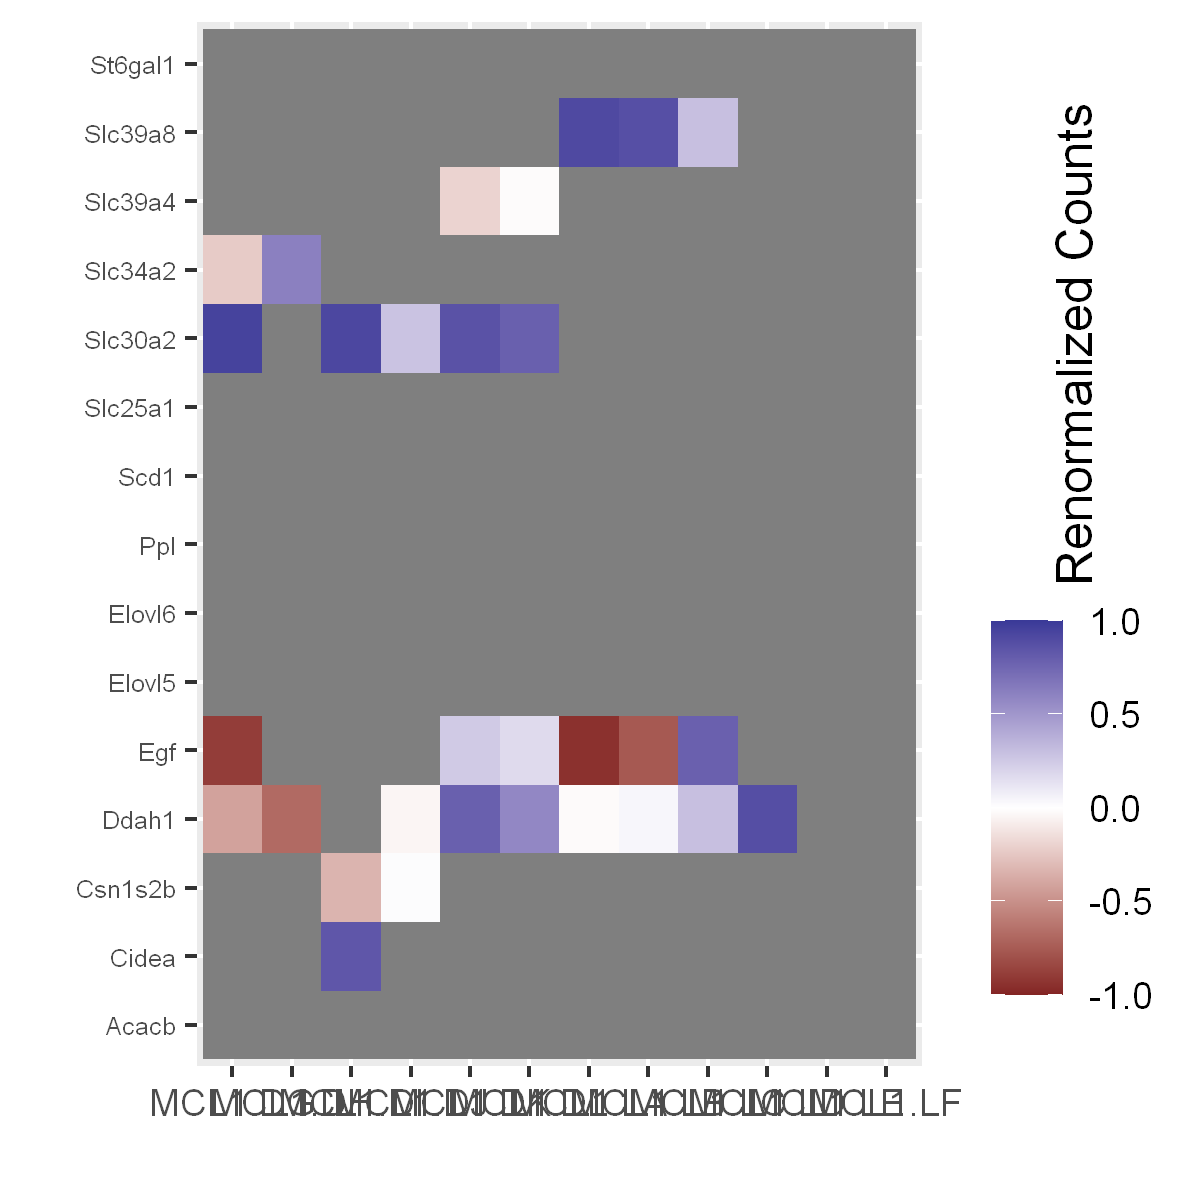

In [50]:
options(jupyter.plot_mimetypes = "image/png", repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 300)

heatmap_plot <- ggplot(data = df_long, aes(x = measurement, y = SYMBOL)) +
    geom_tile(aes(fill = value)) +
    scale_fill_gradient2(limits = c(-1,1), name = 'Renormalized Counts') +
    guides(
        size = "none",
        color = guide_colorbar(title.position = "right")
    ) +
    theme(axis.text.y = element_text(size = 6), 
        legend.key.height = unit(0.25, "in"),
        legend.title = element_text(size = 12, angle = 90),
        legend.title.align = 0.5,
        legend.direction = "vertical"
    ) +
    labs(x = '', y = '') 

heatmap_plot